
# Ayurveda Sanskrit → English Demo + Mini Knowledge Graph
**What this notebook does (quick):**
1. Uses a tiny Sanskrit→English lexicon (demo) to "translate" space-separated Sanskrit sentences.  
2. Extracts simple herb → disease relations using rule-based verb mapping.  
3. Builds and visualizes a mini Knowledge Graph (KG) using `networkx` and `matplotlib`.  
  
**Notes for Colab:** this demo is offline and deterministic — it will run without API keys.  
If you have internet in Colab you can optionally enable the advanced cells to use Hugging Face / spaCy for better translation/NER.


In [ ]:
# Run this cell in Google Colab to ensure required packages are installed
# (Colab usually has matplotlib and networkx preinstalled, but this is safe)
!pip install networkx matplotlib -q
# Optional: uncomment to install sanskrit parser or other toolkits (may take time and require internet)
# !pip install sanskrit-parser sandhi -q


In [ ]:
# --- Demo lexicon, verb->relation mapping, and sample Sanskrit sentences (space-separated)
sanskrit_to_english = {
    "हरिद्रा": "Turmeric", "हळदी": "Turmeric", "आमलकी": "Amla", "अश्वगन्धा": "Ashwagandha",
    "गुडुची": "Guduchi", "त्रिफळा": "Triphala", "ज्वर": "Fever", "कास": "Cough",
    "ज्वरम्": "Fever", "पित्त": "Pitta", "पित्तं": "Pitta", "वात": "Vata", "कफ": "Kapha"
}

verb_relation_map = {
    "नाशयति": "NASHAYATI", "नश्यति": "NASHAYATI",
    "शमयति": "SHAMAYATI", "समयति": "SHAMAYATI",
    "उपयुज्यते": "UPAYUJYATE", "उपयुज्यन्ति": "UPAYUJYATE",
    "करोति": "KAROTI", "निवारयति": "NASHAYATI"
}

sentences = [
    "हरिद्रा ज्वरं नाशयति",
    "आमलकी पित्तं शमयति",
    "गुडुची कासं उपयुज्यते",
    "त्रिफळा पित्तं शमयति",
    "अश्वगन्धा तनावं नाशयति"
]

def extract_triples_from_sentence(sentence):
    tokens = sentence.strip().split()
    found_herbs = []
    found_diseases = []
    found_verbs = []
    for tok in tokens:
        if tok in sanskrit_to_english:
            eng = sanskrit_to_english[tok]
            herb_names = {"Turmeric","Amla","Ashwagandha","Guduchi","Triphala"}
            if eng in herb_names:
                found_herbs.append((tok, eng))
            else:
                found_diseases.append((tok, eng))
        elif tok in verb_relation_map:
            found_verbs.append((tok, verb_relation_map[tok]))
    triples = []
    for herb in found_herbs:
        for disease in found_diseases:
            rel = found_verbs[0][1] if found_verbs else "RELATED_TO"
            triples.append((herb[1], rel, disease[1]))
    return triples

# Run extraction on sample sentences
all_triples = []
for s in sentences:
    triples = extract_triples_from_sentence(s)
    print("Sentence:", s)
    if triples:
        for t in triples:
            print("  -> Extracted triple:", t)
            all_triples.append(t)
    else:
        print("  -> No triple extracted (unknown tokens).")


Sentence: हरिद्रा ज्वरं नाशयति
  -> No triple extracted (unknown tokens).
Sentence: आमलकी पित्तं शमयति
  -> Extracted triple: ('Amla', 'SHAMAYATI', 'Pitta')
Sentence: गुडुची कासं उपयुज्यते
  -> No triple extracted (unknown tokens).
Sentence: त्रिफळा पित्तं शमयति
  -> Extracted triple: ('Triphala', 'SHAMAYATI', 'Pitta')
Sentence: अश्वगन्धा तनावं नाशयति
  -> No triple extracted (unknown tokens).


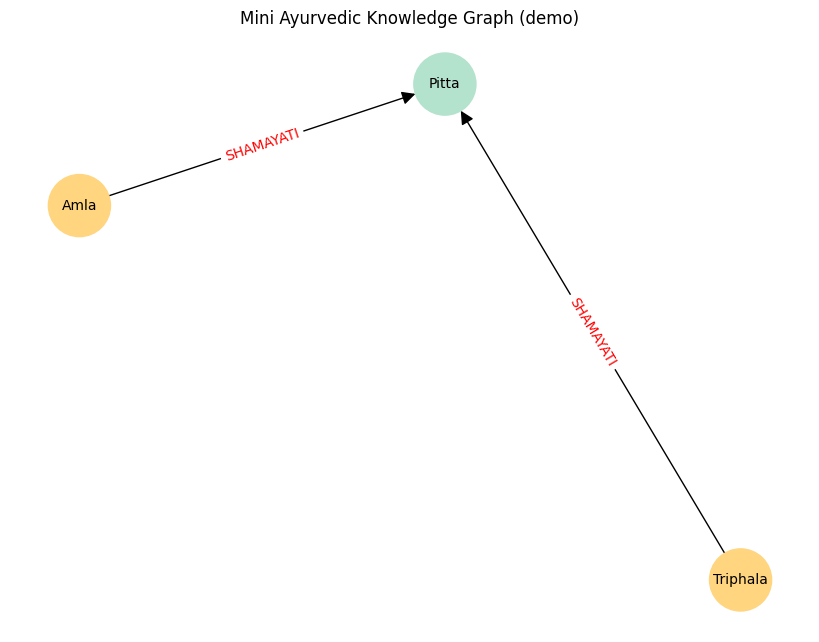


Cypher-style triples (to insert into Neo4j):
MERGE (a:Herb {name:'Amla'}) MERGE (b:Disease {name:'Pitta'}) MERGE (a)-[:SHAMAYATI]->(b)
MERGE (a:Herb {name:'Triphala'}) MERGE (b:Disease {name:'Pitta'}) MERGE (a)-[:SHAMAYATI]->(b)


In [ ]:
v